# Clustering agtech-related stories on Hacker News

In the preceding notebook, I've saved the dataframe containing the agtech-related titles. In this notebook, the aim is to attempt to cluster these stories into different themes based on their titles. I'm curious to see if the stories can be clustered into themes such as vertical farming, cellular agriculture, farm automation, etc.

Now let's load the dataframe I've previously saved.

In [3]:
import pandas as pd
import numpy as np

In [4]:
agtech_df = pd.read_pickle("agtech_titles.pkl")
agtech_df

,title,type,score,comments,timestamp,url,title_lowercase,title_tokens,title_lemmas,title_bigrams
14,"UN adopts Israeli-sponsored resolution on ""Agr...",story,1,-1.0,2007-12-27 11:00:33+00:00,http://www.export.gov.il/Eng/_News/Item.asp?Ca...,un adopts israelisponsored resolution on agric...,"[un, adopts, israelisponsored, resolution, on,...","[un, adopts, israelisponsored, resolution, on,...","[(un, adopts), (adopts, israelisponsored), (is..."
81,Sons of migrant farmworkers co-found promising...,story,1,0.0,2009-02-04 21:47:58+00:00,http://www.siliconvalley.com/news/ci_11620102?...,sons of migrant farmworkers cofound promising ...,"[sons, of, migrant, farmworkers, cofound, prom...","[son, of, migrant, farmworkers, cofound, promi...","[(son, of), (of, migrant), (migrant, farmworke..."
107,Urban farming movement 'like a revolution',story,2,0.0,2009-06-29 20:54:40+00:00,http://www.cnn.com/2009/LIVING/06/29/bia.urban...,urban farming movement like a revolution,"[urban, farming, movement, like, a, revolution]","[urban, farming, movement, like, a, revolution]","[(urban, farming), (farming, movement), (movem..."
128,Vertical Farming: A Farm on Every Floor,story,2,0.0,2009-08-24 13:38:00+00:00,http://www.nytimes.com/2009/08/24/opinion/24De...,vertical farming a farm on every floor,"[vertical, farming, a, farm, on, every, floor]","[vertical, farming, a, farm, on, every, floor]","[(vertical, farming), (farming, a), (a, farm),..."
164,Vertical Farming,story,1,0.0,2009-11-30 02:14:53+00:00,http://techmeh.com/2009/11/vertical-farming-ge...,vertical farming,"[vertical, farming]","[vertical, farming]","[(vertical, farming)]"
...,...,...,...,...,...,...,...,...,...,...
4834,Vertical farms grow veggies on site at restaur...,story,244,231.0,2021-01-20 19:52:58+00:00,https://newatlas.com/good-thinking/vertical-fi...,vertical farms grow veggies on site at restaur...,"[vertical, farms, grow, veggies, on, site, at,...","[vertical, farm, grow, veggie, on, site, at, r...","[(vertical, farm), (farm, grow), (grow, veggie..."
4836,Police discover first cannabis farm in London ...,story,1,0.0,2021-01-20 21:18:50+00:00,https://www.reuters.com/article/us-britain-pol...,police discover first cannabis farm in london ...,"[police, discover, first, cannabis, farm, in, ...","[police, discover, first, cannabis, farm, in, ...","[(police, discover), (discover, first), (first..."
4841,Could Indoor Vertical Farms Feed Livestock?,story,25,34.0,2021-01-22 22:07:00+00:00,https://www.smithsonianmag.com/innovation/coul...,could indoor vertical farms feed livestock,"[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertical, farm, feed, livestock]","[(could, indoor), (indoor, vertical), (vertica..."
4909,Vertical farming does not save space,story,4,1.0,2021-02-17 16:17:05+00:00,https://solar.lowtechmagazine.com/2021/02/vert...,vertical farming does not save space,"[vertical, farming, does, not, save, space]","[vertical, farming, doe, not, save, space]","[(vertical, farming), (farming, doe), (doe, no..."


To cluster stories, words have to be converted into numerical vectors that machine learning algorithms can interpret. This process is known as vectorization or word embedding. There are different techniques that can be used for vectorization. Here I will be looking into **TF-IDF**.

## TF-IDF

TF-IDF stands for **term frequency-inverse document frequency**. The method is divided into two steps:  
- Term frequency: measures how frequently a term *t* occurs in a document *d*, with words occurring more frequently given a higher weight.
- Inverse document frequency: measures the importance of a term *t* in a set of documents *D*. It reduces the weights of words that occur frequently and increases the weights of words that occur less frequently.   

The formula to calculate tf-idf is:
tfidf(t, d, D) = tf(t, d) * idf(t, D)

where,

- *t* is a term (word)
- *d* is a document that this term is in
- *D* is a collection of all documents


While it is easy to compute tf-idf using sklearn, let's examine each step in detail to understand the two steps.

To illustrate the mathematical, I'll use some rows from the agtech_df.

In [5]:
titles = agtech_df['title'].sample(4).tolist()
titles

['FarmLogs (YC W12) is hiring for product and eng. Hack 65M+ acres of land',
 'Indoor Vertical Farms Are the (Expensive) Future of Food',
 'The Future of Precision Agriculture Is Decentralized',
 'Rounding Up the Risks of Big Ag']

Using sklearn, we can use the CountVectorizer to calculate the **term frequency** (i.e. the number of times a term *t* occurs in document *d*).

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(binary=False) # we cound ignore binary=False argument since it is default
word_count_vector = cvec.fit_transform(titles)

In [7]:
# sparse matrix generated by count vectoriser
print(cvec.fit_transform(titles).todense())

[[1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0]]


In [8]:
tf = pd.DataFrame(word_count_vector.toarray(), columns = cvec.get_feature_names())
tf

,65m,acres,ag,agriculture,and,are,big,decentralized,eng,expensive,...,of,precision,product,risks,rounding,the,up,vertical,w12,yc
0,1,1,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,0,0,1,1
1,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
2,0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,1,1,1,0,0,0


The dataframe shows the counts of each word.

Next, the IDF can be calculated by fitting the TfidfTransformer() with the word_count_vector.

By using the default parameter smooth_id=True, the idf is calculated as log\[(1 + n) / 1 + df(t))\] + 1. (Other idf formulas can be specified, see the [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) doc for more information.)

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(smooth_idf=True)
X = tfidf_transformer.fit_transform(word_count_vector)
idf = pd.DataFrame({'feature_name':cvec.get_feature_names(), 'idf_weights':tfidf_transformer.idf_})
idf

,feature_name,idf_weights
0,65m,1.916291
1,acres,1.916291
2,ag,1.916291
3,agriculture,1.916291
4,and,1.916291
5,are,1.916291
6,big,1.916291
7,decentralized,1.916291
8,eng,1.916291
9,expensive,1.916291


And the final feature vectors after normalisation shown below. Normalisation is based on the Euclidean distance.

In [10]:
tf_idf = pd.DataFrame(X.toarray() ,columns=cvec.get_feature_names())
tf_idf

,65m,acres,ag,agriculture,and,are,big,decentralized,eng,expensive,...,of,precision,product,risks,rounding,the,up,vertical,w12,yc
0,0.278489,0.278489,0.000000,0.000000,0.278489,0.000000,0.000000,0.000000,0.278489,0.000000,...,0.145327,0.000000,0.278489,0.000000,0.000000,0.000000,0.000000,0.000000,0.278489,0.278489
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.370083,0.000000,0.000000,0.000000,0.370083,...,0.193125,0.000000,0.000000,0.000000,0.000000,0.236219,0.000000,0.370083,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.450701,0.000000,0.000000,0.000000,0.450701,0.000000,0.000000,...,0.235195,0.450701,0.000000,0.000000,0.000000,0.287677,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.419601,0.000000,0.000000,0.000000,0.419601,0.000000,0.000000,0.000000,...,0.218965,0.000000,0.000000,0.419601,0.419601,0.267826,0.419601,0.000000,0.000000,0.000000


The two steps of using the CountVectorizer followed by the TfidfTransformer is equivalent to passing it through the TfidfVectorizer in one step. The dataframe of normalised features obtained is the same as that obtained above.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec_test = TfidfVectorizer(norm='l2')
tfidf_matrix = vec_test.fit_transform(titles)
tfidf_matrix_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vec_test.get_feature_names())
tfidf_matrix_df

,65m,acres,ag,agriculture,and,are,big,decentralized,eng,expensive,...,of,precision,product,risks,rounding,the,up,vertical,w12,yc
0,0.278489,0.278489,0.000000,0.000000,0.278489,0.000000,0.000000,0.000000,0.278489,0.000000,...,0.145327,0.000000,0.278489,0.000000,0.000000,0.000000,0.000000,0.000000,0.278489,0.278489
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.370083,0.000000,0.000000,0.000000,0.370083,...,0.193125,0.000000,0.000000,0.000000,0.000000,0.236219,0.000000,0.370083,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.450701,0.000000,0.000000,0.000000,0.450701,0.000000,0.000000,...,0.235195,0.450701,0.000000,0.000000,0.000000,0.287677,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.419601,0.000000,0.000000,0.000000,0.419601,0.000000,0.000000,0.000000,...,0.218965,0.000000,0.000000,0.419601,0.419601,0.267826,0.419601,0.000000,0.000000,0.000000


## K-means clustering

Now it is time to perform K-means clustering on the data.
In the above example, I calculated the TD-IDF without processing the data. However, text data is usually preprocessed before being converted into vectors.  
Since the title column in agtech_df has already been converted to lowercase and has been tokenised, I can proceed with the next step of removing stop words from the token columns.

In [12]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.util import ngrams
from nltk.corpus import stopwords
import re  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fangn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fangn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
# remove stop words from tokens
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

agtech_df.loc[:, 'tokens_no_stops'] = agtech_df['title_tokens'].apply(lambda x: [token for token in x if token not in stop_words])
agtech_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fangn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,type,score,comments,timestamp,url,title_lowercase,title_tokens,title_lemmas,title_bigrams,tokens_no_stops
14,"UN adopts Israeli-sponsored resolution on ""Agr...",story,1,-1.0,2007-12-27 11:00:33+00:00,http://www.export.gov.il/Eng/_News/Item.asp?Ca...,un adopts israelisponsored resolution on agric...,"[un, adopts, israelisponsored, resolution, on,...","[un, adopts, israelisponsored, resolution, on,...","[(un, adopts), (adopts, israelisponsored), (is...","[un, adopts, israelisponsored, resolution, agr..."
81,Sons of migrant farmworkers co-found promising...,story,1,0.0,2009-02-04 21:47:58+00:00,http://www.siliconvalley.com/news/ci_11620102?...,sons of migrant farmworkers cofound promising ...,"[sons, of, migrant, farmworkers, cofound, prom...","[son, of, migrant, farmworkers, cofound, promi...","[(son, of), (of, migrant), (migrant, farmworke...","[sons, migrant, farmworkers, cofound, promisin..."
107,Urban farming movement 'like a revolution',story,2,0.0,2009-06-29 20:54:40+00:00,http://www.cnn.com/2009/LIVING/06/29/bia.urban...,urban farming movement like a revolution,"[urban, farming, movement, like, a, revolution]","[urban, farming, movement, like, a, revolution]","[(urban, farming), (farming, movement), (movem...","[urban, farming, movement, like, revolution]"
128,Vertical Farming: A Farm on Every Floor,story,2,0.0,2009-08-24 13:38:00+00:00,http://www.nytimes.com/2009/08/24/opinion/24De...,vertical farming a farm on every floor,"[vertical, farming, a, farm, on, every, floor]","[vertical, farming, a, farm, on, every, floor]","[(vertical, farming), (farming, a), (a, farm),...","[vertical, farming, farm, every, floor]"
164,Vertical Farming,story,1,0.0,2009-11-30 02:14:53+00:00,http://techmeh.com/2009/11/vertical-farming-ge...,vertical farming,"[vertical, farming]","[vertical, farming]","[(vertical, farming)]","[vertical, farming]"
...,...,...,...,...,...,...,...,...,...,...,...
4834,Vertical farms grow veggies on site at restaur...,story,244,231.0,2021-01-20 19:52:58+00:00,https://newatlas.com/good-thinking/vertical-fi...,vertical farms grow veggies on site at restaur...,"[vertical, farms, grow, veggies, on, site, at,...","[vertical, farm, grow, veggie, on, site, at, r...","[(vertical, farm), (farm, grow), (grow, veggie...","[vertical, farms, grow, veggies, site, restaur..."
4836,Police discover first cannabis farm in London ...,story,1,0.0,2021-01-20 21:18:50+00:00,https://www.reuters.com/article/us-britain-pol...,police discover first cannabis farm in london ...,"[police, discover, first, cannabis, farm, in, ...","[police, discover, first, cannabis, farm, in, ...","[(police, discover), (discover, first), (first...","[police, discover, first, cannabis, farm, lond..."
4841,Could Indoor Vertical Farms Feed Livestock?,story,25,34.0,2021-01-22 22:07:00+00:00,https://www.smithsonianmag.com/innovation/coul...,could indoor vertical farms feed livestock,"[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertical, farm, feed, livestock]","[(could, indoor), (indoor, vertical), (vertica...","[could, indoor, vertical, farms, feed, livestock]"
4909,Vertical farming does not save space,story,4,1.0,2021-02-17 16:17:05+00:00,https://solar.lowtechmagazine.com/2021/02/vert...,vertical farming does not save space,"[vertical, farming, does, not, save, space]","[vertical, farming, doe, not, save, space]","[(vertical, farming), (farming, doe), (doe, no...","[vertical, farming, save, space]"


In [14]:
# stem the words
stemmer = SnowballStemmer("english")

agtech_df['stemmed'] = agtech_df['tokens_no_stops'].apply(lambda x: [stemmer.stem(y) for y in x])
agtech_df

,title,type,score,comments,timestamp,url,title_lowercase,title_tokens,title_lemmas,title_bigrams,tokens_no_stops,stemmed
14,"UN adopts Israeli-sponsored resolution on ""Agr...",story,1,-1.0,2007-12-27 11:00:33+00:00,http://www.export.gov.il/Eng/_News/Item.asp?Ca...,un adopts israelisponsored resolution on agric...,"[un, adopts, israelisponsored, resolution, on,...","[un, adopts, israelisponsored, resolution, on,...","[(un, adopts), (adopts, israelisponsored), (is...","[un, adopts, israelisponsored, resolution, agr...","[un, adopt, israelisponsor, resolut, agricultu..."
81,Sons of migrant farmworkers co-found promising...,story,1,0.0,2009-02-04 21:47:58+00:00,http://www.siliconvalley.com/news/ci_11620102?...,sons of migrant farmworkers cofound promising ...,"[sons, of, migrant, farmworkers, cofound, prom...","[son, of, migrant, farmworkers, cofound, promi...","[(son, of), (of, migrant), (migrant, farmworke...","[sons, migrant, farmworkers, cofound, promisin...","[son, migrant, farmwork, cofound, promis, sili..."
107,Urban farming movement 'like a revolution',story,2,0.0,2009-06-29 20:54:40+00:00,http://www.cnn.com/2009/LIVING/06/29/bia.urban...,urban farming movement like a revolution,"[urban, farming, movement, like, a, revolution]","[urban, farming, movement, like, a, revolution]","[(urban, farming), (farming, movement), (movem...","[urban, farming, movement, like, revolution]","[urban, farm, movement, like, revolut]"
128,Vertical Farming: A Farm on Every Floor,story,2,0.0,2009-08-24 13:38:00+00:00,http://www.nytimes.com/2009/08/24/opinion/24De...,vertical farming a farm on every floor,"[vertical, farming, a, farm, on, every, floor]","[vertical, farming, a, farm, on, every, floor]","[(vertical, farming), (farming, a), (a, farm),...","[vertical, farming, farm, every, floor]","[vertic, farm, farm, everi, floor]"
164,Vertical Farming,story,1,0.0,2009-11-30 02:14:53+00:00,http://techmeh.com/2009/11/vertical-farming-ge...,vertical farming,"[vertical, farming]","[vertical, farming]","[(vertical, farming)]","[vertical, farming]","[vertic, farm]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4834,Vertical farms grow veggies on site at restaur...,story,244,231.0,2021-01-20 19:52:58+00:00,https://newatlas.com/good-thinking/vertical-fi...,vertical farms grow veggies on site at restaur...,"[vertical, farms, grow, veggies, on, site, at,...","[vertical, farm, grow, veggie, on, site, at, r...","[(vertical, farm), (farm, grow), (grow, veggie...","[vertical, farms, grow, veggies, site, restaur...","[vertic, farm, grow, veggi, site, restaur, gro..."
4836,Police discover first cannabis farm in London ...,story,1,0.0,2021-01-20 21:18:50+00:00,https://www.reuters.com/article/us-britain-pol...,police discover first cannabis farm in london ...,"[police, discover, first, cannabis, farm, in, ...","[police, discover, first, cannabis, farm, in, ...","[(police, discover), (discover, first), (first...","[police, discover, first, cannabis, farm, lond...","[polic, discov, first, cannabi, farm, london, ..."
4841,Could Indoor Vertical Farms Feed Livestock?,story,25,34.0,2021-01-22 22:07:00+00:00,https://www.smithsonianmag.com/innovation/coul...,could indoor vertical farms feed livestock,"[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertical, farm, feed, livestock]","[(could, indoor), (indoor, vertical), (vertica...","[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertic, farm, feed, livestock]"
4909,Vertical farming does not save space,story,4,1.0,2021-02-17 16:17:05+00:00,https://solar.lowtechmagazine.com/2021/02/vert...,vertical farming does not save space,"[vertical, farming, does, not, save, space]","[vertical, farming, doe, not, save, space]","[(vertical, farming), (farming, doe), (doe, no...","[vertical, farming, save, space]","[vertic, farm, save, space]"


In [15]:
# lastly, join the stemmed words back together 
def rejoin_words(my_row):
    my_list = my_row['stemmed']
    joined_words = ( " ".join(my_list))
    return joined_words

agtech_df['title_processed'] = agtech_df.apply(rejoin_words, axis=1)
agtech_df

,title,type,score,comments,timestamp,url,title_lowercase,title_tokens,title_lemmas,title_bigrams,tokens_no_stops,stemmed,title_processed
14,"UN adopts Israeli-sponsored resolution on ""Agr...",story,1,-1.0,2007-12-27 11:00:33+00:00,http://www.export.gov.il/Eng/_News/Item.asp?Ca...,un adopts israelisponsored resolution on agric...,"[un, adopts, israelisponsored, resolution, on,...","[un, adopts, israelisponsored, resolution, on,...","[(un, adopts), (adopts, israelisponsored), (is...","[un, adopts, israelisponsored, resolution, agr...","[un, adopt, israelisponsor, resolut, agricultu...",un adopt israelisponsor resolut agricultur tec...
81,Sons of migrant farmworkers co-found promising...,story,1,0.0,2009-02-04 21:47:58+00:00,http://www.siliconvalley.com/news/ci_11620102?...,sons of migrant farmworkers cofound promising ...,"[sons, of, migrant, farmworkers, cofound, prom...","[son, of, migrant, farmworkers, cofound, promi...","[(son, of), (of, migrant), (migrant, farmworke...","[sons, migrant, farmworkers, cofound, promisin...","[son, migrant, farmwork, cofound, promis, sili...",son migrant farmwork cofound promis silicon va...
107,Urban farming movement 'like a revolution',story,2,0.0,2009-06-29 20:54:40+00:00,http://www.cnn.com/2009/LIVING/06/29/bia.urban...,urban farming movement like a revolution,"[urban, farming, movement, like, a, revolution]","[urban, farming, movement, like, a, revolution]","[(urban, farming), (farming, movement), (movem...","[urban, farming, movement, like, revolution]","[urban, farm, movement, like, revolut]",urban farm movement like revolut
128,Vertical Farming: A Farm on Every Floor,story,2,0.0,2009-08-24 13:38:00+00:00,http://www.nytimes.com/2009/08/24/opinion/24De...,vertical farming a farm on every floor,"[vertical, farming, a, farm, on, every, floor]","[vertical, farming, a, farm, on, every, floor]","[(vertical, farming), (farming, a), (a, farm),...","[vertical, farming, farm, every, floor]","[vertic, farm, farm, everi, floor]",vertic farm farm everi floor
164,Vertical Farming,story,1,0.0,2009-11-30 02:14:53+00:00,http://techmeh.com/2009/11/vertical-farming-ge...,vertical farming,"[vertical, farming]","[vertical, farming]","[(vertical, farming)]","[vertical, farming]","[vertic, farm]",vertic farm
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,Vertical farms grow veggies on site at restaur...,story,244,231.0,2021-01-20 19:52:58+00:00,https://newatlas.com/good-thinking/vertical-fi...,vertical farms grow veggies on site at restaur...,"[vertical, farms, grow, veggies, on, site, at,...","[vertical, farm, grow, veggie, on, site, at, r...","[(vertical, farm), (farm, grow), (grow, veggie...","[vertical, farms, grow, veggies, site, restaur...","[vertic, farm, grow, veggi, site, restaur, gro...",vertic farm grow veggi site restaur groceri store
4836,Police discover first cannabis farm in London ...,story,1,0.0,2021-01-20 21:18:50+00:00,https://www.reuters.com/article/us-britain-pol...,police discover first cannabis farm in london ...,"[police, discover, first, cannabis, farm, in, ...","[police, discover, first, cannabis, farm, in, ...","[(police, discover), (discover, first), (first...","[police, discover, first, cannabis, farm, lond...","[polic, discov, first, cannabi, farm, london, ...",polic discov first cannabi farm london financi...
4841,Could Indoor Vertical Farms Feed Livestock?,story,25,34.0,2021-01-22 22:07:00+00:00,https://www.smithsonianmag.com/innovation/coul...,could indoor vertical farms feed livestock,"[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertical, farm, feed, livestock]","[(could, indoor), (indoor, vertical), (vertica...","[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertic, farm, feed, livestock]",could indoor vertic farm feed livestock
4909,Vertical farming does not save space,story,4,1.0,2021-02-17 16:17:05+00:00,https://solar.lowtechmagazine.com/2021/02/vert...,vertical farming does not save space,"[vertical, farming, do

Having processed the text, the TD-IDF can be computed.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
x = vec.fit_transform(agtech_df['title_processed'])
x

<371x791 sparse matrix of type '<class 'numpy.float64'>'
	with 2462 stored elements in Compressed Sparse Row format>

In [17]:
# this shows the matrix in a df 
x_df = pd.DataFrame(x.toarray(), columns = vec.get_feature_names())
x_df

,100,10000,100m,10k,10m,13,1600s,1m,1st,200m,...,wors,would,yc,year,yet,yield,york,youd,zero,ÿnsect
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
x[0]
# for index in x[0]
for t in x[0]:
    print(t)

  (0, 187)	0.40364005083360194
  (0, 698)	0.287548771550126
  (0, 44)	0.17949049881104182
  (0, 580)	0.43175930159548814
  (0, 386)	0.43175930159548814
  (0, 35)	0.40364005083360194
  (0, 733)	0.43175930159548814


The K-means algorithm works by first selecting *k* centroids. After which the algorithm works by a two-step process called expectation-maximisation. The expectation step assigns each data point to its nearest centroid. Then the maximization step computes the mean of all the points for each cluster and sets the new centroid. This process continues until the centroids have converged.

In the expectation step, each observation/data point is assigned to the cluster with the nearest mean, meaning the one with the least squared Euclidean distance.

The number of centroids k has to be chosen beforehand. To identify the appropriate value for k, the silhouette coefficient method can be used. The silhoutte coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:  
1. How close the data point is to other points in the cluster
2. How far away the data point is from points in other clusters  

Silhoutte coefficients range between -1 and 1. Silhoutte coefficients near +1 indicate that the sample is far away from the nieghboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. Negative values indicate that those samples might have been assigned to the wrong clusters.

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# list to hold the silhoutte coefficients for each k
silhouette_coefficients = []

# start at 2 clusters for the silhoutte coefficient
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=300,n_init=10,random_state=0) #still not very sure of the arguments in this
    kmeans.fit(x)
    score = silhouette_score(x, kmeans.labels_)
    silhouette_coefficients.append(score)

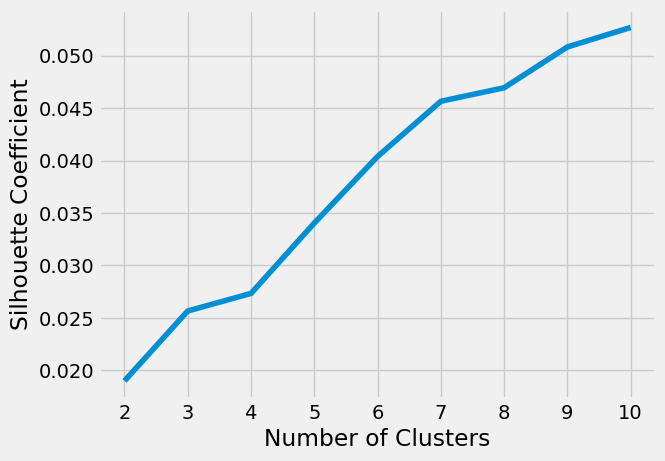

In [20]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

From the diagram, it seems like the algorithm may not be appropriate since the silhouette coefficients are all very close to 0, indicating that the clusters are very close. To examine this problem, I'll compare the distance of a few randomly selected observations from the centroid of their assigned clusters to that of other clusters.

For this, I'll choose k=10 since it seems to be the best number from the figure.

In [21]:
number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters)
km.fit(x)
km.fit

<bound method KMeans.fit of KMeans(n_clusters=10)>

In [22]:
agtech_df = agtech_df.reset_index()
agtech_df

,index,title,type,score,comments,timestamp,url,title_lowercase,title_tokens,title_lemmas,title_bigrams,tokens_no_stops,stemmed,title_processed
0,14,"UN adopts Israeli-sponsored resolution on ""Agr...",story,1,-1.0,2007-12-27 11:00:33+00:00,http://www.export.gov.il/Eng/_News/Item.asp?Ca...,un adopts israelisponsored resolution on agric...,"[un, adopts, israelisponsored, resolution, on,...","[un, adopts, israelisponsored, resolution, on,...","[(un, adopts), (adopts, israelisponsored), (is...","[un, adopts, israelisponsored, resolution, agr...","[un, adopt, israelisponsor, resolut, agricultu...",un adopt israelisponsor resolut agricultur tec...
1,81,Sons of migrant farmworkers co-found promising...,story,1,0.0,2009-02-04 21:47:58+00:00,http://www.siliconvalley.com/news/ci_11620102?...,sons of migrant farmworkers cofound promising ...,"[sons, of, migrant, farmworkers, cofound, prom...","[son, of, migrant, farmworkers, cofound, promi...","[(son, of), (of, migrant), (migrant, farmworke...","[sons, migrant, farmworkers, cofound, promisin...","[son, migrant, farmwork, cofound, promis, sili...",son migrant farmwork cofound promis silicon va...
2,107,Urban farming movement 'like a revolution',story,2,0.0,2009-06-29 20:54:40+00:00,http://www.cnn.com/2009/LIVING/06/29/bia.urban...,urban farming movement like a revolution,"[urban, farming, movement, like, a, revolution]","[urban, farming, movement, like, a, revolution]","[(urban, farming), (farming, movement), (movem...","[urban, farming, movement, like, revolution]","[urban, farm, movement, like, revolut]",urban farm movement like revolut
3,128,Vertical Farming: A Farm on Every Floor,story,2,0.0,2009-08-24 13:38:00+00:00,http://www.nytimes.com/2009/08/24/opinion/24De...,vertical farming a farm on every floor,"[vertical, farming, a, farm, on, every, floor]","[vertical, farming, a, farm, on, every, floor]","[(vertical, farming), (farming, a), (a, farm),...","[vertical, farming, farm, every, floor]","[vertic, farm, farm, everi, floor]",vertic farm farm everi floor
4,164,Vertical Farming,story,1,0.0,2009-11-30 02:14:53+00:00,http://techmeh.com/2009/11/vertical-farming-ge...,vertical farming,"[vertical, farming]","[vertical, farming]","[(vertical, farming)]","[vertical, farming]","[vertic, farm]",vertic farm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,4834,Vertical farms grow veggies on site at restaur...,story,244,231.0,2021-01-20 19:52:58+00:00,https://newatlas.com/good-thinking/vertical-fi...,vertical farms grow veggies on site at restaur...,"[vertical, farms, grow, veggies, on, site, at,...","[vertical, farm, grow, veggie, on, site, at, r...","[(vertical, farm), (farm, grow), (grow, veggie...","[vertical, farms, grow, veggies, site, restaur...","[vertic, farm, grow, veggi, site, restaur, gro...",vertic farm grow veggi site restaur groceri store
367,4836,Police discover first cannabis farm in London ...,story,1,0.0,2021-01-20 21:18:50+00:00,https://www.reuters.com/article/us-britain-pol...,police discover first cannabis farm in london ...,"[police, discover, first, cannabis, farm, in, ...","[police, discover, first, cannabis, farm, in, ...","[(police, discover), (discover, first), (first...","[police, discover, first, cannabis, farm, lond...","[polic, discov, first, cannabi, farm, london, ...",polic discov first cannabi farm london financi...
368,4841,Could Indoor Vertical Farms Feed Livestock?,story,25,34.0,2021-01-22 22:07:00+00:00,https://www.smithsonianmag.com/innovation/coul...,could indoor vertical farms feed livestock,"[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertical, farm, feed, livestock]","[(could, indoor), (indoor, vertical), (vertica...","[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertic, farm, feed, livestock]",could indoor vertic farm feed livestock
369,4909,Vertical farming does not save space,story,4,1.0,2021-02-17 16:17:05+00:00,https://solar.lowtechmagazine.com/2021/02/vert...,vertical farming does no

In [23]:
centroids = km.cluster_centers_
centroids.shape

(10, 791)

In [24]:
x.toarray().shape

(371, 791)

In [25]:
from scipy import spatial
dist_from_centroids = spatial.distance.cdist(x.toarray(), centroids, 'euclidean')
dist_from_centroids

array([[1.12957328, 1.0179832 , 1.04200263, ..., 1.09579166, 1.0551511 ,
        0.96890115],
       [1.12970657, 1.05593246, 1.03706119, ..., 1.09379136, 0.93660053,
        1.06839347],
       [1.12728559, 1.01394493, 1.01989227, ..., 1.07254785, 1.04686105,
        1.04694089],
       ...,
       [1.1248294 , 1.04672734, 0.93349354, ..., 1.0742835 , 1.02098242,
        1.04880098],
       [1.12658382, 1.05793293, 0.94361483, ..., 1.0762224 , 1.03774087,
        1.05293368],
       [1.12114012, 1.05881386, 1.01603132, ..., 1.08548437, 1.0454629 ,
        1.05757132]])

In [26]:
# sanity check the dimensions of the matrix
dist_from_centroids.shape

(371, 10)

Now that I've calculated the Euclidean distance between each observation and the 10 centroids, I can compare the distance between a point and its assigned cluster and that of another cluster.

In [27]:
km.labels_

array([9, 8, 3, 2, 2, 2, 2, 3, 2, 3, 7, 2, 2, 2, 3, 2, 3, 2, 4, 9, 3, 9,
       9, 9, 9, 9, 9, 9, 9, 3, 4, 0, 1, 2, 2, 9, 9, 0, 0, 0, 6, 8, 5, 2,
       2, 3, 3, 3, 7, 8, 2, 4, 2, 3, 6, 3, 5, 5, 2, 3, 3, 1, 3, 0, 9, 0,
       0, 2, 0, 0, 2, 0, 0, 2, 4, 3, 3, 3, 3, 3, 3, 2, 8, 0, 3, 2, 2, 4,
       2, 8, 3, 0, 1, 4, 0, 0, 2, 2, 2, 2, 2, 7, 2, 8, 2, 7, 3, 8, 3, 5,
       2, 8, 3, 3, 1, 7, 7, 2, 3, 7, 4, 2, 3, 9, 4, 2, 7, 2, 2, 7, 9, 8,
       1, 1, 2, 9, 2, 2, 1, 2, 2, 7, 7, 3, 8, 2, 1, 2, 9, 0, 5, 5, 6, 1,
       1, 3, 1, 3, 4, 0, 8, 8, 8, 2, 1, 0, 8, 3, 1, 1, 8, 8, 3, 8, 2, 3,
       4, 2, 7, 3, 2, 9, 2, 2, 7, 8, 9, 4, 4, 2, 4, 4, 3, 1, 2, 3, 7, 7,
       4, 6, 6, 6, 6, 6, 8, 0, 6, 4, 1, 1, 1, 1, 9, 2, 1, 9, 5, 4, 9, 1,
       4, 4, 2, 2, 2, 6, 2, 1, 1, 2, 2, 4, 4, 2, 9, 1, 3, 2, 0, 5, 6, 6,
       6, 6, 2, 4, 2, 2, 9, 7, 1, 7, 7, 2, 2, 6, 5, 5, 5, 5, 2, 8, 9, 2,
       0, 7, 1, 0, 9, 9, 1, 3, 5, 9, 1, 7, 1, 3, 7, 2, 2, 7, 2, 2, 3, 7,
       3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 8, 6, 1, 3, 3,

In [28]:
agtech_df['kmeans_class'] = km.labels_

In [29]:
agtech_df

,index,title,type,score,comments,timestamp,url,title_lowercase,title_tokens,title_lemmas,title_bigrams,tokens_no_stops,stemmed,title_processed,kmeans_class
0,14,"UN adopts Israeli-sponsored resolution on ""Agr...",story,1,-1.0,2007-12-27 11:00:33+00:00,http://www.export.gov.il/Eng/_News/Item.asp?Ca...,un adopts israelisponsored resolution on agric...,"[un, adopts, israelisponsored, resolution, on,...","[un, adopts, israelisponsored, resolution, on,...","[(un, adopts), (adopts, israelisponsored), (is...","[un, adopts, israelisponsored, resolution, agr...","[un, adopt, israelisponsor, resolut, agricultu...",un adopt israelisponsor resolut agricultur tec...,9
1,81,Sons of migrant farmworkers co-found promising...,story,1,0.0,2009-02-04 21:47:58+00:00,http://www.siliconvalley.com/news/ci_11620102?...,sons of migrant farmworkers cofound promising ...,"[sons, of, migrant, farmworkers, cofound, prom...","[son, of, migrant, farmworkers, cofound, promi...","[(son, of), (of, migrant), (migrant, farmworke...","[sons, migrant, farmworkers, cofound, promisin...","[son, migrant, farmwork, cofound, promis, sili...",son migrant farmwork cofound promis silicon va...,8
2,107,Urban farming movement 'like a revolution',story,2,0.0,2009-06-29 20:54:40+00:00,http://www.cnn.com/2009/LIVING/06/29/bia.urban...,urban farming movement like a revolution,"[urban, farming, movement, like, a, revolution]","[urban, farming, movement, like, a, revolution]","[(urban, farming), (farming, movement), (movem...","[urban, farming, movement, like, revolution]","[urban, farm, movement, like, revolut]",urban farm movement like revolut,3
3,128,Vertical Farming: A Farm on Every Floor,story,2,0.0,2009-08-24 13:38:00+00:00,http://www.nytimes.com/2009/08/24/opinion/24De...,vertical farming a farm on every floor,"[vertical, farming, a, farm, on, every, floor]","[vertical, farming, a, farm, on, every, floor]","[(vertical, farming), (farming, a), (a, farm),...","[vertical, farming, farm, every, floor]","[vertic, farm, farm, everi, floor]",vertic farm farm everi floor,2
4,164,Vertical Farming,story,1,0.0,2009-11-30 02:14:53+00:00,http://techmeh.com/2009/11/vertical-farming-ge...,vertical farming,"[vertical, farming]","[vertical, farming]","[(vertical, farming)]","[vertical, farming]","[vertic, farm]",vertic farm,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,4834,Vertical farms grow veggies on site at restaur...,story,244,231.0,2021-01-20 19:52:58+00:00,https://newatlas.com/good-thinking/vertical-fi...,vertical farms grow veggies on site at restaur...,"[vertical, farms, grow, veggies, on, site, at,...","[vertical, farm, grow, veggie, on, site, at, r...","[(vertical, farm), (farm, grow), (grow, veggie...","[vertical, farms, grow, veggies, site, restaur...","[vertic, farm, grow, veggi, site, restaur, gro...",vertic farm grow veggi site restaur groceri store,2
367,4836,Police discover first cannabis farm in London ...,story,1,0.0,2021-01-20 21:18:50+00:00,https://www.reuters.com/article/us-britain-pol...,police discover first cannabis farm in london ...,"[police, discover, first, cannabis, farm, in, ...","[police, discover, first, cannabis, farm, in, ...","[(police, discover), (discover, first), (first...","[police, discover, first, cannabis, farm, lond...","[polic, discov, first, cannabi, farm, london, ...",polic discov first cannabi farm london financi...,5
368,4841,Could Indoor Vertical Farms Feed Livestock?,story,25,34.0,2021-01-22 22:07:00+00:00,https://www.smithsonianmag.com/innovation/coul...,could indoor vertical farms feed livestock,"[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertical, farm, feed, livestock]","[(could, indoor), (indoor, vertical), (vertica...","[could, indoor, vertical, farms, feed, livestock]","[could, indoor, vertic, farm, feed, livestock]",could indoor vertic farm feed livestock,2
369,4909,Vertical farming does not save space,story,4,1.0,2021-02-17 16:17:05+00:00,https://solar.lowtechmagazine.com/2021/02

Before that, I'll first perform a sanity check to check whether the smallest value in the distance from centroids vector of an observation corresponds to the index/number of its assigned cluster. This is because the k-means algorithm assigns an observation to the cluster whose centroid is nearest to it. 

In [45]:
def check_centroid(my_dist_from_centroids, my_km_labels):
    # choose a random integer between 0 and 374
    rand_integer=np.random.randint(low=0, high=375)

    # obtain corresponding row from dist_from_centroids matrix 
    selected_row = my_dist_from_centroids[rand_integer,:]

    # and gets the index of the min value in the vector
    min_index = np.argmin(selected_row)

    # select the corresponding element from the km labels array
    corresponding_cluster = my_km_labels[rand_integer]

    # print them side by side
    print(f'Index: {rand_integer}')
    print(f'Nearest centroid: {min_index}')
    print(f'Assigned cluster: {corresponding_cluster}')

In [46]:
check_centroid(dist_from_centroids, km.labels_)

Index: 210
Nearest centroid: 1
Assigned cluster: 1


In [47]:
dist_from_centroids[210,:]

array([1.12864543, 0.92409745, 1.04136596, 1.03402382, 1.06731059,
       1.09495767, 1.19939362, 1.09579166, 1.05330357, 1.052434  ])

From inspecting a row in the dist_from_centroids matrix, the range of distances between all centroids of an observation is very small relative to the magnitude of the distances. This seems to correspond with the low silhouette coefficient observed in the graph above.

If time permits, use dimension reduction to visualise clusters?

## Conclusion

This exercise in k-means clustering of headlines was not very successful because of the limitations of the dataset I chose:
- Dataset with 375 rows might not be sufficientlly large to perform clustering (some recommend using smaples sizes of >500). With small datasets, the number of clusters you aim to get will generally be much smaller than the number of variables you use as input, which increases the risk of spurious groupings.
- Dataset might not be sufficiently varied in terms of themes.
- Titles of the HN stories are quite sparse, making them more challenging to cluster compared to longer texts.  

Nonetheless, this exercise still allowed me examine the concepts of text clustering (td-idf, k-means algorithm, silhouette coefficient) in greater detail, which will help me in future text clusertering projects.